# Машинное обучение, ВМК МГУ

# Практическое задание 3

### Общая информация

Дата выдачи: 2 ноября 2020

Мягкий дедлайн: 01:00MSK 16 ноября 2020 (за каждый день просрочки снимается 1 балл, отсчет дней ведите от 01:00 2 ноября)

Жесткий дедлайн: 01:00MSK 23 ноября 2020.

### О задании

В этом задании вы:
- настроите метод опорных векторов, визуализируете опорные вектора
- познакомитесь с калибровочными кривыми и сравните вероятности, выдаваемые логистической регрессией и методом опорных векторов
- изучите методы работы с категориальными переменными
- в качестве бонуса попробуете библиотеку vowpal wabbit.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл *.ipynb в соответствии со следующим форматом: homework-practice-3-Username.ipynb, где Username — ваша фамилия и имя на латинице именно в таком порядке (например, homework-practice-3-IvanovIvan.ipynb).

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка:** ...

**Напоминание:**
    
* Все ваши графики должны быть **"красивыми"** --- подробнее о том, как их оформлять, можно найти в первом практическом задании. При несоответствии какиму-то из критериев вам могут снять баллы.
* Пишите в текстовых ячейках/print в коде ответы на **все вопросы из заданий/просьбы сделать выводы** --- при их отсутствии мы не можем понять, сделали ли вы задание и понимаете, что происходит, и поэтому будем снижать баллы

In [1]:
%pylab inline
import pandas as pd

from sklearn.datasets import load_diabetes, make_classification
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия

В этой части мы кратко познакомимся с линейной регрессией.

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3.

In [2]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

**Посмотрим на данные**

In [3]:
print(load_diabetes().DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [4]:
X_train[:10], y_train[:10]

(array([[ 0.03444337,  0.05068012,  0.02828403, -0.03321358, -0.04559945,
         -0.00976889, -0.05076412, -0.00259226, -0.0594727 , -0.02178823],
        [ 0.04897352,  0.05068012,  0.12313149,  0.08384403, -0.10476542,
         -0.10089509, -0.06917231, -0.00259226,  0.0366458 , -0.03007245],
        [-0.06000263, -0.04464164,  0.04445121, -0.01944209, -0.00982468,
         -0.00757685,  0.02286863, -0.03949338, -0.02712865, -0.00936191],
        [ 0.0090156 ,  0.05068012,  0.06924089,  0.05974393,  0.01769438,
         -0.02323427, -0.04708248,  0.03430886,  0.10329226,  0.07348023],
        [-0.02730979,  0.05068012,  0.06061839,  0.04941532,  0.08511607,
          0.08636769, -0.00290283,  0.03430886,  0.03781448,  0.04862759],
        [-0.06363517, -0.04464164, -0.03315126, -0.03321358,  0.00118295,
          0.02405115, -0.02499266, -0.00259226, -0.02251217, -0.05906719],
        [ 0.01628068,  0.05068012,  0.00241654, -0.00567061, -0.00569682,
          0.01089891, -0.0507641

__Задание 1.__ Обучение линейной регрессии.

**(1 балл)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов (веса, они же составляют вектор w) близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа **ненулевых коэффициентов от коэффицента регуляризации** (перебирайте значения по _логарифмической сетке_ от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями? 

**Замечания:**
* Используйте модели из sklearn
* Можно строить графики с учетом $w_0$ (bias), можно без **(обязательно поясните, как в итоге строили),**  однако стоит учитывать, что $w_0 \approx 0$ несет другой смысл, нежели чем $w_i \approx 0$.
* Перебор по логарифмической сетке от $10^{-3}$ до $10^{3}$ подразумевает **равномерный перебор по степеням:** $10^{-3}, 10^{-2}, 10^{-1}, 10^{0}$ итд. Однако ничего не мешает (и не будет лишним) сделать и более частую равномерную сетку, если позволяет время вычислений. Менее частую сетку лучше делать в тех случаях, когда вычисления совсем запредельные по времени, однако помните, что делание выводов о какой-либо зависимости по 3-4 точкам может привести к ошибочным результатам **(и такое будет засчитываться как ошибка, если не пояснено, почему нельзя было сделать больше точек)**

In [5]:
from sklearn.linear_model import Ridge, Lasso
import seaborn as sn
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 14})

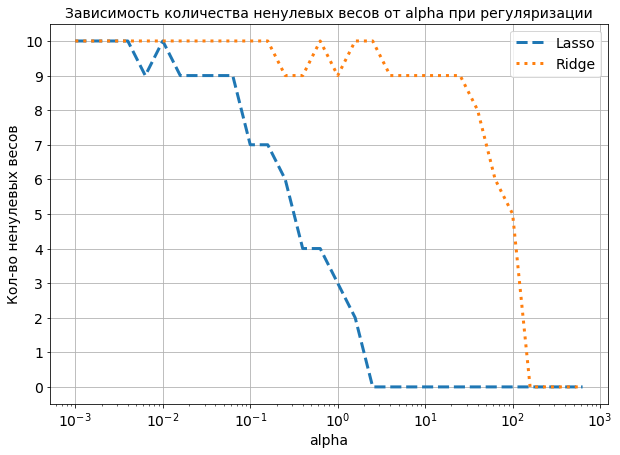

In [6]:
# Вообще говоря, существуют специальные статистические методы определения "бесполезности"
# признака в линейной модели, но это слишком сложно:)
# важно упомянуть, что все признаки нормализованы
# написал 5, потому что в среднем все коэфиценты довольно большие
min_value = 5
grid = 10**np.arange(-3, 3, 0.2, dtype=float)
num_nonzero_coefs = {"lasso": [], "ridge": []}

# использую w0 - fit_intercept=True по умолчанию
models = {}
models["lasso"] = Lasso()
models["ridge"] = Ridge()
for a in grid:
    for m in models:
        models[m].alpha = a
        models[m].fit(X_train, y_train)
        num_nonzero_coefs[m].append((np.abs(models[m].coef_) > min_value).sum())

plt.figure(figsize=(10, 7))
plt.xscale("log")

plt.plot(grid, num_nonzero_coefs["lasso"], label="Lasso", ls="--", lw=3)
plt.plot(grid, num_nonzero_coefs["ridge"], label="Ridge", ls=":", lw=3)
plt.title("Зависимость количества ненулевых весов от alpha при регуляризации", fontsize=14)

plt.yticks(range(0, 11))
plt.xlabel("alpha")
plt.ylabel("Кол-во ненулевых весов")
plt.legend()
plt.grid(True)
plt.show()

**Значение alpha по умолчанию 1**  
Количество ненулевых признаков для Ridge: 9  
Количество ненулевых признаков для Lasso: 3

**Ответ: да, результаты вполне ожидаемы.  
Lasso неважно какой вес уменьшать на $\varepsilon$, поэтому многие веса будут близко к нулю  
Ridge будет уменьшать лишь очень большие веса, а маленькие уже не будут так важны.**

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [8]:
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)
y_pred = model_ridge.predict(X_test)
print("RMSE", mean_squared_error(y_pred, y_test, squared=False))
print("MAE", mean_absolute_error(y_pred, y_test))
print("R2", r2_score(y_test, y_pred))

RMSE 58.304415127748044
MAE 49.60284607275299
R2 0.3598993868368464


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

**Замечание:** функцию потерь на выборке (X, y) можно, например, посчитать вручную, вытащив коэффициенты из модели (обычно это атрибут coef_) и учитывая коэффициент регуляризации $\alpha$.

In [9]:
from sklearn.model_selection import GridSearchCV

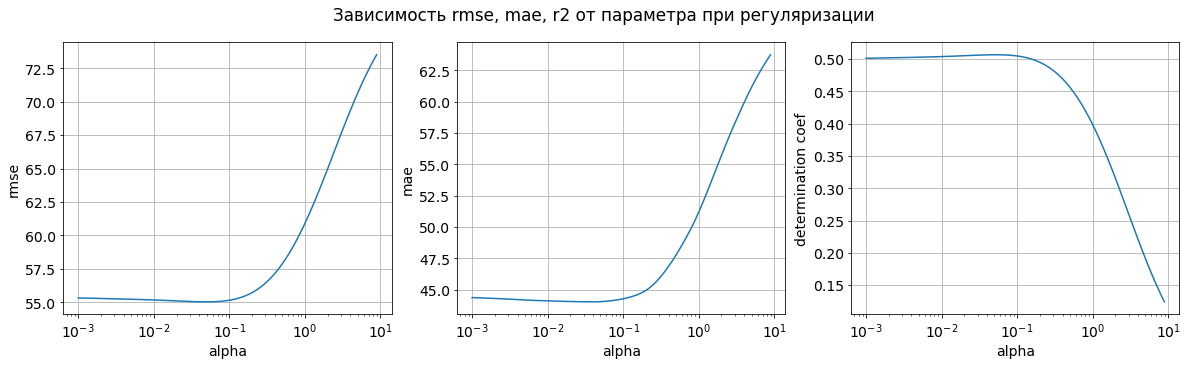

In [10]:
params = {"alpha": 10**np.arange(-3, 1, 0.05, dtype=float)}
scores = ["neg_root_mean_squared_error", "neg_mean_absolute_error", "r2"]
names = ["rmse", "mae", "determination coef"]

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle("Зависимость rmse, mae, r2 от параметра при регуляризации")

best_m = []
for i, s in enumerate(scores):
    gs = GridSearchCV(Ridge(), params, scoring=s, cv=3, refit=True)
    gs.fit(X_train, y_train)
    best_m.append(gs.best_estimator_)
    ax[i].plot(params["alpha"], (1-2*(s != "r2"))*gs.cv_results_["mean_test_score"])
    ax[i].set_xscale("log")
    ax[i].set_xlabel("alpha")
    ax[i].set_ylabel(names[i])
    ax[i].grid(True)

In [11]:
print("Best models")
print(
    f"RMSE, alpha {best_m[0].alpha:.03f}, {mean_squared_error(best_m[0].predict(X_test), y_test, squared=False):.03f}")
print(f"MAE, alpha {best_m[1].alpha:.03f}, {mean_absolute_error(best_m[1].predict(X_test), y_test):.03f}")
print(f"R2, alpha {best_m[2].alpha:.03f}, {r2_score(y_test, best_m[2].predict(X_test)):.03f}")

Best models
RMSE, alpha 0.050, 55.662
MAE, alpha 0.040, 47.078
R2, alpha 0.050, 0.417


**Ответ: Качество улучшилось по всем метрикам, но несильно**

__Задание 2.__ Поиск объектов-выбросов

**(0.5 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной (или, называемой валидационной) (X_test, y_test) выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
y_pred_oof = cross_val_predict(Ridge(best_m[0].alpha), X_train, y_train, cv=y_train.size)  # leave one out

print(f"y_train : mean {y_train.mean():.0f}, median {np.median(y_train)}")

residual_oof = np.abs(y_train-y_pred_oof)

plt.figure(figsize=(15, 7))
plt.title("Распределение ошибок")
sn.histplot(residual_oof, zorder=1000)

plt.axvline(residual_oof.mean(), color='r', linestyle='--', label=f"mae = {residual_oof.mean():.0f}")

plt.xlabel("Ошибки модели без удаления выбросов")
plt.legend()
plt.grid(zorder=-1)
plt.show()

Будем считать выбросами те объекты, на которых получилась ошибка больше, чем 145 (выяcнил лучшее значение перебором)

In [ ]:
mask = residual_oof < 145
print(f"Удалили {(~mask).sum()} объекта\n")
for model in best_m:
    model.fit(X_train[mask], y_train[mask])
print("Best models with filter outliers")
print(
    f"RMSE, alpha {best_m[0].alpha:.03f}, {mean_squared_error(best_m[0].predict(X_test), y_test, squared=False):.03f}")
print(f"MAE, alpha {best_m[1].alpha:.03f}, {mean_absolute_error(best_m[1].predict(X_test), y_test):.03f}")
print(f"R2, alpha {best_m[2].alpha:.03f}, {r2_score(y_test, best_m[2].predict(X_test)):.03f}")

**Ответ: в среднем значения ошибок довольно большие(если учесть среднее значение целевой переменной). Выбросов не очень много, если считать выбросами объекты, на которых ошибка >145, то это всего два объекта(если >100, то 9).**

**После удаления выбросов качество по rmse и mae стало чуть лучше, но в пределах статистической погрешности. Коэффициент детерминации не изменился. Думаю стало лучше лишь потому что я подобрал критерий отобра под тестовую выборку, но если размышлять концептуально, то убрав выбросы модель не будет пытаться подстраиваться под них при обучении и сможет лучше найти правильную зависимость между признаками и целевой переменной**

## Часть 2. Метод опорных векторов и калибровка вероятностней

Сгенерируем синтетические данные.

In [ ]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

__Задание 1.__ Обучение и применение метода опорных векторов.

__(1 балл)__

Обучите метод опорных векторов. На занятиях мы проходили обычный вариант, что соответствует линейному ядру (LinearSVC/LinearSVR в scikit-learn).

In [ ]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые.

In [ ]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

В названии метода присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью make_classification с 2 признаками (хотя бы 100 объектов, но желательно больше), обучите на нём метод опорных векторов. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут support\_vectors\_). В этот раз вместо LinearSVC воспользуйтесь SVC с линейным ядром (kernel='linear'), так как только в нём есть информация об опорных векторах.

**Замечания:**
* Графики должны быть оформлены правильно, в соответствии с теми требованиями, которые были в первой лабороторной. Так же опорные вектора следует рисовать не другим цветом, а другой **меткой** (например, крестик), иначе теряется принадлежность к классу. Точки из разных классов рисуйте **разными цветами** (или разными фигурами). Если необходимо, можно вводить альфа-канал (степень прозрачности) для улучшения восприятия. Можно (и очень рекомендуется) рисовать не только разделяющую прямую, но из "разделяющую полосу" вокруг прямой.
* **Обязательно пишите легенду,** поясняющую что изображено на полотне.

In [ ]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

__Задание 2.__ Калибровка вероятностей.

__(1.5 балла)__

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых. 

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [ ]:
def plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l - r) / 2)
        bin_real_ratios.append(np.min(y_test[(preds >= l) & (preds < r)] == 1))
    plt.plot(bin_middle_points, bin_real_ratios)

Постройте калибровочные кривые для логистической регрессии и метода опорных векторов. Изучите распределение ответов классификаторов (постройте гистограммы с помощью plt.hist). Чем они различаются? Чем вы можете объяснить это?

Заметим, что метод опорных векторов не умеет predict_proba, но имеет метод decision_function.

In [ ]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Воспользуйтесь CalibratedClassifierCV из sklearn для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

In [ ]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

__Бонусное задание (1 балл).__ Реализуйте свою функцию для калибровки вероятностей. Опишите ваш подход и продемонстрируйте результаты.

In [ ]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

## Часть 3. Логистическая регрессия.

__Задание 3.__ Обучение логистической регрессии на реальных данных и оценка качества классификации.

**(0.5 балл)**

__Подготовка данных.__

Загрузим данные с конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом под нужды задания мы немного модифицируем датасет.

In [318]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
print(data.shape)
data.head(5)

(595212, 57)


,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,2,2,5,1,0,0,1,0,0,0,...,9,1,5,8,0,1,1,0,0,1
9,1,1,7,0,0,0,0,1,0,0,...,3,1,1,9,0,1,1,0,1,0
13,5,4,9,1,0,0,0,1,0,0,...,4,2,7,7,0,1,1,0,1,0
16,0,1,2,0,0,1,0,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,2,0,1,0,1,0,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [319]:
data.describe()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [320]:
(target==1).mean()

0.036447517859182946

In [321]:
data.dtypes 

ps_ind_01           int64
ps_ind_02_cat       int64
ps_ind_03           int64
ps_ind_04_cat       int64
ps_ind_05_cat       int64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat       int64
ps_car_02_cat       int64
ps_car_03_cat       int64
ps_car_04_cat       int64
ps_car_05_cat       int64
ps_car_06_cat       int64
ps_car_07_cat       int64
ps_car_08_cat       int64
ps_car_09_cat       int64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11           int64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15         float64
ps_calc_01        float64
ps_calc_02  

Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.


In [322]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

Обучите логистическую регрессию с удобными для вас параметрами. Сделайте предсказание на тестовой части выборки.

In [323]:
from sklearn.linear_model import LogisticRegression
from sklearn. preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve, precision_score

In [181]:
grid = {
    "logistic__C": np.logspace(-2, 4, 9),
}
model = Pipeline([
    ("logistic", LogisticRegression(penalty="l2", max_iter=500, n_jobs=-1))
])
gs = GridSearchCV(model, param_grid=grid, scoring="accuracy", cv=3, n_jobs=-1, refit=True)
gs.fit(X_train, y_train)
gs.best_score_

0.5881600086175457

In [182]:
y_pred_proba = gs.predict_proba(X_test)
accuracy_score(y_pred_proba[:, 1] > 0.5, y_test)

0.58621

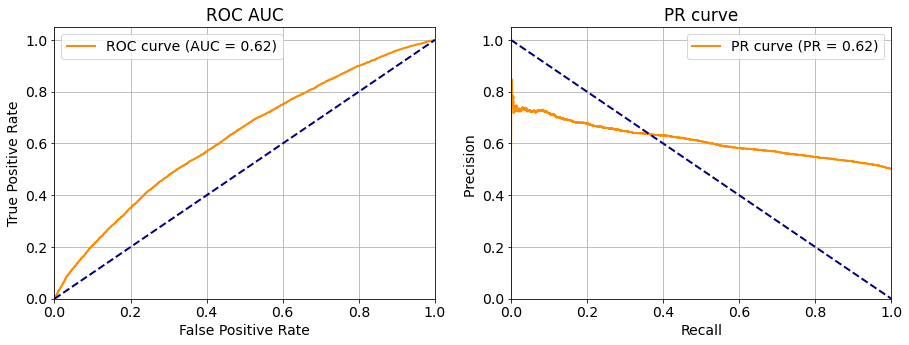

In [184]:
# https://gist.github.com/Keiku/b6dca88b9bbe7b55701e43f7f5ee19a6

fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)
pr, rc, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
pr_score = precision_score(y_test, y_pred_proba[:, 1] > 0.5)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(fpr, tpr, color='darkorange',
           lw=2, label=f'ROC curve (AUC = {roc_auc:0.2f})')
ax[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax[0].set_xlim([0.0, 1.0])
ax[0].set_ylim([0.0, 1.05])
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('ROC AUC')
ax[0].grid(True)
ax[0].legend()

ax[1].plot(rc, pr, color='darkorange',
           lw=2, label=f'PR curve (PR = {roc_auc:0.2f})')
ax[1].plot([0, 1], [1, 0], color='navy', lw=2, linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision ')
ax[1].set_title('PR curve')
ax[1].grid(True)
ax[1].legend()

plt.show()

Постройку ROC-кривую и Precision-Recall-кривую, посчитайте ROC-AUC и PR-AUC. Какие наблюдения и выводы по ним можно сделать? (В свободной форме)

**Ответ: Можно сделать вывод, что модель недостаточно хорошо умеет классифицировать таргет. Желательно, чтобы ROC-AUC был больше хотя бы 0.7 - это уже приемлемый результат  
Интересным получился график pr curve. В самом начале precision очень сильно падает, а потом кривая становится почти линейной. Это может говорить о том, что некоторую часть объектов класса 0 мы с очень большой степенью уверенности относим к 1 классу. Если "выкинуть" или как-то учесть эти объекты, то качество могло бы повысится**

__Задание 4.__ Изучение влияния регуляризатора на процесс обучения

__(1 балл)__

Проверьте на практике, как влияет регуляризатор на процесс обучения (убывание функции потерь на обучающей и отложенной выборках). Чтобы считать функцию потерь на отложенной выборке после каждой итерации, можно воспользоваться параметром `warm_start` у `sklearn.linear_model.LogisticRegression` либо методом `partial_fit` `sklearn.linear_model.SGDClassifier` (параметр `loss` тогда должен быть равен `log`).

Замечание:
* Для каждого $\alpha$ своя функция на графике; функции можно отображать на одном полотне **обязательно с легендой;** если $\alpha$ слишком много и на одном полотне они выглядят грязно, то можно строить на нескольких, однако в этом случае рекомендуется приводить масштаб и деления (min, max значения) на оси $y$ к одним  и тем же значениям --- так визуально будет очень просто сравнить графики и сделать выводы :)
* $\alpha$ желательно перебирать по **логарифмической шкале** (примерно как в первом задании), однако можно использовать информацию о том, что при некоторых значениях $\alpha$ модель не обучается хорошо и не исследовать их. Тут обязательно перебрать хотя бы 3 разных (степени в лог. шкале) $\alpha$, больше -- приветствуется.

In [122]:
from sklearn.utils import shuffle
from sklearn.metrics import log_loss

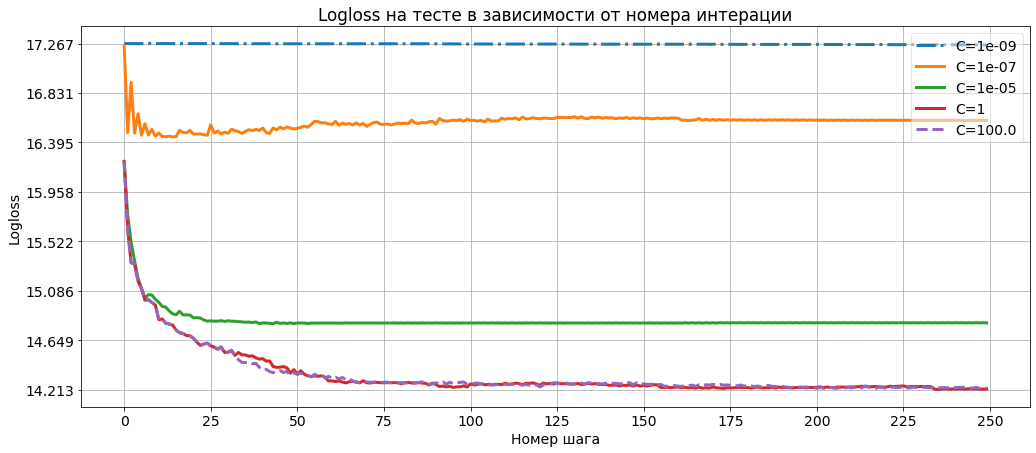

In [153]:
grid = [1e-9, 1e-7, 1e-5, 1, 1e2]
ls = ["-.", "-", "-", "-", "--"]
max_iter = 250
min_loss = float("+inf")
max_loss = float("-inf")

plt.figure(figsize(17, 7))
for j, g in enumerate(grid):
    # max_iter = 2, а не 1, потому что происходит какой-то ад, если 2
    model = LogisticRegression(penalty="l2", C=g, max_iter=2, warm_start=True)
    loss = []
    for i in range(max_iter):
        model.fit(X_train, y_train)
        l = log_loss(model.predict(X_test), y_test)
        loss.append(l)
        if(l > max_loss):
            max_loss = l
        elif(l < min_loss):
            min_loss = l
    plt.plot(np.arange(max_iter), loss, label=f"C={g}", lw=3, ls=ls[j])
plt.title("Logloss на тесте в зависимости от номера интерации")
plt.xlabel("Номер шага")
plt.ylabel("Logloss")
plt.xticks(list(range(0, max_iter, 25))+[max_iter])
plt.yticks(np.linspace(min_loss, max_loss, 8))
plt.legend(loc="upper right", framealpha=0.5)
plt.grid(True)
plt.show()

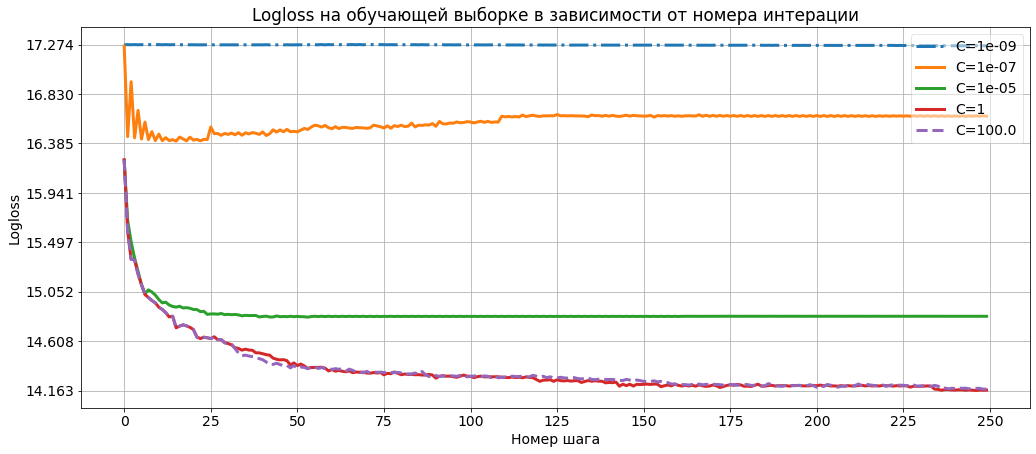

In [155]:
grid = [1e-9, 1e-7, 1e-5, 1, 1e2]
ls = ["-.", "-", "-", "-", "--"]
max_iter = 250
min_loss = float("+inf")
max_loss = float("-inf")

plt.figure(figsize(17, 7))
for j, g in enumerate(grid):
    model = LogisticRegression(penalty="l2", C=g, max_iter=2, warm_start=True)
    loss = []
    for i in range(max_iter):
        model.fit(X_train, y_train)
        l = log_loss(model.predict(X_train), y_train)
        loss.append(l)
        if(l > max_loss):
            max_loss = l
        elif(l < min_loss):
            min_loss = l
    plt.plot(np.arange(max_iter), loss, label=f"C={g}", lw=3, ls=ls[j])
plt.title("Logloss на обучающей выборке в зависимости от номера интерации")
plt.xlabel("Номер шага")
plt.ylabel("Logloss")
plt.xticks(list(range(0, max_iter, 25))+[max_iter])
plt.yticks(np.linspace(min_loss, max_loss, 8))
plt.legend(loc="upper right", framealpha=0.5)
plt.grid(True)
plt.show()

## Часть 4. Работа с категориальными переменными

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

В этой части работаем с датасетом из предыдущей части.

__Задание 5.__ Посчитайте качество (в этом задании будем работать c ROC-AUC) на исходных признаках при применении логистической регрессии.

__(0 баллов)__

In [197]:
model = LogisticRegression(penalty="l1", solver="liblinear", n_jobs=-1)
t = %timeit -q -o -n 1 -r 1 model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)
print(f"time {t.average:.02f}c, accuracy {accuracy_score(y_pred_proba[:, 1] > 0.5, y_test)}, roc auc {roc_auc}")

time 29.14c, accuracy 0.58584, roc auc 0.6230662311750171


__Задание 6.__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на обучение модели.

__(0.5 балла)__

In [301]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [312]:
cat_features = [s for s in X_train.columns if s[-3:] == "cat"]
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
# добавим еще scale числовых значений
num_features = [s for s in X_train.columns if s[-3:] != "cat" and s[-3:] != "bin"]
num_transformer = Pipeline(steps=[
    ('scale', StandardScaler())
])

transformer = ColumnTransformer(
    transformers=[("cat", cat_transformer, cat_features),
                  ("num", num_transformer, num_features)])

model = Pipeline([
    ("transformer", transformer),
    ("logistic", LogisticRegression(penalty="l1", solver="liblinear", n_jobs=-1))
])
t = %timeit -q -o -n 1 -r 1 model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)
print(
    f"time {t.average:.02f}c, accuracy {accuracy_score(y_pred_proba[:, 1] > 0.5, y_test)}, roc auc {roc_auc}")

time 28.23c, accuracy 0.58943, roc auc 0.6254339685889072


**Ответ: Качество на тестовой выборке практически не выросло после onehot кодирования.**

Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

def val_count(a, uniq, count):
    tmp = np.where(uniq == a)[0]
    if(tmp.size == 0):
        return 0
    return count[tmp]


vec_val_count = np.vectorize(val_count, excluded=[1, 2])Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки. 

__(Бонусная часть)__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (необходимо соблюсти баланс между избавление от переобучения и полезностью признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы. Не забудьте замерить время.

__(+0.5 балл)__

In [238]:
# Служебные функции
from scipy.stats import chi2


def freq_categorical(X, uniq=None, count=None, return_count=True):
    tmp_list = []
    for i in range(X.shape[1]):
        if(uniq is not None and count is not None):
            u, c = uniq[i], count[i]
        else:
            u, c = np.unique(X[:, i], return_counts=True)
        if(not return_count):
            c = c/c.sum()
        tmp_list.append(dict(zip(u, c)))
    return tmp_list


def freq_encoder(X, freq=None):
    if freq is None:
        freq = freq_categorical(X)

    ans = np.empty_like(X, dtype=float)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            ans[i, j] = freq[j].get(X[i, j], 0)
    return ans


def val_count(a, uniq, count):
    tmp = np.where(uniq == a)[0]
    if(tmp.size == 0):
        return 0
    return count[tmp]


vec_val_count = np.vectorize(val_count, excluded=[1, 2])


def counters(X, indexs=None, return_u_c=False):
    """
    X - матрица объекты-признаки
    indexs - маска по объектам
    """
    if(indexs is None):
        indexs = np.full(X.shape[0], True)
    uniq = []
    count = []
    ans = np.empty_like(X, dtype=float)

    for i in range(X.shape[1]):
        u, c = np.unique(X[indexs.ravel(), i], return_counts=True)
        ans[:, i] = vec_val_count(X[:, i], u, c)
        uniq.append(u)
        count.append(c)
    if(return_u_c):
        return ans, uniq, count
    return ans


def f_counters(X, n=3, indexs=None):
    """
    X - матрица объекты-признаки
    indexs - маска по объектам
    """
    ans = np.empty_like(X, dtype=float)
    kf = KFold(n).split(X[:, 0])
    mask = None
    for other, arr in kf:
        if indexs is not None:
            if indexs.dtype == int:
                mask = indexs[indexs < other.size]
            elif indexs.dtype == bool:
                mask = indexs[other].ravel()

        for i in range(X.shape[1]):
            u, c = np.unique(X[other[mask], i], return_counts=True)
            ans[arr, i] = vec_val_count(X[arr, i], u, c)

    return ans


def noise(shape, cv=chi2, df=1, **kwargs):
    tmp = np.empty(shape)
    for i in range(shape[0]):
        tmp[i, :] = cv.rvs(df, size=shape[1])
    return tmp

In [247]:
def counters_noise(X, y, correction=1, ** kwargs):
    """
    X - матрица объекты-признаки, 
    y - вектор целевых переменных
    correction - чтобы не было нулевых значений
    """
    return counters(X, indexs=(y == 1))/(counters(X)+correction)+noise(X.shape, **kwargs)

In [248]:
_, uniq, count = counters(X_train, return_u_c=True)
tmp_1 = freq_encoder(X_test, freq_categorical(X_test, uniq, count))

_, uniq, count = counters(X_train, return_u_c=True, indexs=(y_train == 1))
tmp_2 = freq_encoder(X_test, freq_categorical(X_test, uniq, count))

X_test_noise = tmp_2/(tmp_1+1)+noise(X_test.shape)
X_train_noise = counters_noise(X_train, y_train)

In [250]:
model = LogisticRegression(penalty="l2", n_jobs=-1)
t = %timeit -q -o -n 1 -r 1 model.fit(X_train_noise, y_train)
y_pred_proba = model.predict_proba(X_test_noise)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)
print(f"time {t.average:.02f}c, accuracy {accuracy_score(y_pred_proba[:, 1] > 0.5, y_test)}, roc auc {roc_auc}")

time 4.09c, accuracy 0.55522, roc auc 0.6231770646658885


__(Бонусная часть)__ Посчитайте корректные счётчики, основываясь на объектах расположеных выше в датасете (не забудьте добавить и шум). 

__(+0.5 балла)__

In [209]:
# устал делать категориальные штуки :(
# вставлю сюда подход с фолдами, потому что он у меня есть!
def counters_folds(X, y, a=1, b=2):
    """
    X - матрица объекты-признаки, 
    y - вектор целевых переменных
    """
    return (f_counters(X, indexs=(y == 1))+a)/(f_counters(X)+b)

А теперь ответьте на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:
$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$
где $global\_mean$ — среднее значение целевой переменной по всей выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значении. И тем меньше, чем большее количество объектов этой категории встречается в выборке. 

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения!

__Задание 7.__ Реализуйте счетчики со сглаживанием, как описано выше. Обучите логистическую регрессию, оцените качество.

__(0.5 балл)__

In [ ]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

__Замечание.__ Усложнение методов вычисления счётчиков не делают результаты модели гарантированно лучше. Особенно с учётом того, что логистическая регрессия не такая сложная модель, чтобы переобучаться. Поэтому вы необязательно должны были получать на каждом шаге всё лучшие и лучшие результаты (но необходимые результаты у вас должны были получиться).

Как вы должны были заметить, счётчики являются хорошей альтернативой one-hot-кодированию. Напишите, какие плюсы и минусы использования счётчиков по сравнению с one-hot-кодированием, вы заметили.

**Ответ: ... ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ**

## Отбор признаков

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом их расчёт занимает время) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тому же датасету про обращение клиентов по страховым случаям. Обойдёмся без сэмплирования объектов.

In [331]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [333]:
cat_features = [s for s in X_train.columns if s[-3:] == "cat"]
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
# добавим еще scale для числовых значений
num_features = [s for s in X_train.columns if s[-3:] != "cat" and s[-3:] != "bin"]
num_transformer = Pipeline(steps=[
    ('scale', StandardScaler())
])

transformer = ColumnTransformer(
    transformers=[("cat", cat_transformer, cat_features),
                  ("num", num_transformer, num_features)])

print("количество признаков", transformer.fit_transform(X_train).shape[1])


model = Pipeline([
    ("transformer", transformer),
    ("logistic", LogisticRegression(penalty="l1", solver="liblinear", n_jobs=-1))
])
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)
print(f"accuracy {accuracy_score(y_pred_proba[:, 1] > 0.5, y_test)}, roc auc {roc_auc}")

количество признаков 210
accuracy 0.9637021916450358, roc auc 0.6342505213724529


В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — ROC-AUC. Обучите модель и посчитайте качество на тестовой выборке. Давайте запомним полученное значение.

### Встроенные методы

Допустим, мы хотим оставить только 200 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отборам признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded methods, так как он заложен в особенности модели.

__Задание 8.__ Оставьте 200 признаков с наибольшим модулем соответсвующего параметра линейной модели. Обучите модели заново и оцените её качество. Замерьте скорость такого отбора признаков (время обучения нашего метода отбора).

Изменилось ли качество? Как?

__(0.5 балла)__

In [263]:
from sklearn.feature_selection import SelectFromModel

In [267]:
select = SelectFromModel(model,prefit=True,max_features=200)
X_train_st = select.transform(X_train_oh)
X_test_st = select.transform(X_test_oh)
X_train_st.shape, X_test_st.shape

((476169, 200), (119043, 200))

In [268]:
model = LogisticRegression(penalty="l1", solver="liblinear")
model.fit(X_train_st,y_train)
y_pred_proba = model.predict_proba(X_test_st)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)
print(f"accuracy {accuracy_score(y_pred_proba[:, 1] > 0.5, y_test)}, roc-auc {roc_auc}")

accuracy 0.9636937913191032, roc-auc 0.5001569111167827


А теперь давайте подумаем, что мы не учли. Мы предположили, что признаки вносят вклад равномерно, но не учли их масштаба. Если мы умножим один из признаков в 100 раз, то без учёта регуляризации его вес уменьшится в эти же 100 раз. А мы на основе этого отбираем признаки! Давайте сначала отнормируем признаки одним из способов, а только потом будем удалять признаки. 

Кстати, в таком случае надо пересчитать качество на всех признаках (сделайте это ниже). Если вы сделали нормирование признаков в самом начале, то попробуйте отобрать признаки на неотмасштабированных данных.

Что получилось?

In [270]:
model = Pipeline([
    ("scale", StandardScaler()),
    ("logistic", LogisticRegression(penalty="l1", solver="liblinear"))
])

model.fit(X_train_oh, y_train)
y_pred_proba = model.predict_proba(X_test_oh)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)
print(f"accuracy {accuracy_score(y_pred_proba[:, 1] > 0.5, y_test)}, roc-auc {roc_auc}")

ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.

### Методы фильтрации

Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или  filter methods. 

В качестве такой функции будем считать t-статистику:

$$t(x) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

где $\mu_{+/-}$, $\sigma_{+/-}$, $n_{+/-}$ соответственно это --- среднее; среднеквадратичное отклонение; количество объектов каждого из классов.

__Задание 9.__ Оставьте 200 признаков с наибольшим значением и замерьте качество. Не забудьте замерить скорость отбора признаков (время обучения нашего метода отбора) в этом случаев.

__(0.5 балла)__

In [ ]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

### Методы-обёртки

__Задание 10.__ 

__(1 балл)__

Заключительный из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди один из признаков и смотрим, как это влияет на качество. Удаляем признаки таким жадным способом, пока не достигнем некоторого критерия (количество признаков или ухудшением качества).

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только на финальной оценке качества.

Сделайте одну итерацию и прикиньте, сколько времени займёт такой отбор признаков. Кажется, что чересчур. Давайте возьмём маленький сэмпл данных (например, в 10 тысяч объектов), что сильно уменьшит время итерации. Теперь это долго, но уже приемлимо. 

Если это всё ещё долго для вашего комьютера, можете попробовать брать не по одному признаку, а сразу по пять (и удалять сразу тоже по 5). Для этого перед каждой итерацией удаления делите заново все признаки на группы по 5 штук.

Снова оставьте только 200 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [ ]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Давайте подведём итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству?

**Ответ: ... ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ**

## Настройка порога для бинаризации вероятностей

В этой части мы будем проделывать стандартные операции для подготовки модели к её реальному использованию — подбора порога для бинаризации вероятностей с учётом потребностей бизнеса или продукта. Хороший алгоритм с точки зрения ROC-AUC это, конечно, хорошо, но ведь в реальности нам надо принимать решение бинарно, например, выдавать ли кредит человеку. 

Воспользуемся той же самой задачей, что и в предыдущем разделе — определение обращение клиента в страховую в ближайшее время. Положительные объекты в нашей выборки как раз обратившиеся в страховую клиенты. 

Не вдаваясь в подробности бизнеса страховых, можно понять, что обращение клиента по страховому случаю для нас как страховой невыгодно, ведь мы теряем на этом деньги. Клиенты, которые не обращаются в страховую и ездят аккуратно, приносят нам деньги.

Пусть на каждом клиенте, который обратился в нашу страховую, мы теряем 100000, а на клиенте, который не обратился в страховую, мы зарабатываем 5000. 

Будем строить алгоритм, который прогнозирует обращение по страховому случаю, чтобы некоторым потенциальным клиентам отказывать в обслуживании, если мы уверены, что на них мы потеряем деньги.

In [ ]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

В этот раз мы не будем сэмплировать данные и будем использовать их "как есть".

Посчитайте долю положительных примеров в выборке? Скажите, почему она такая?

In [ ]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить.

In [ ]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

В качестве нашей основной модели будем использовать логистическую регрессию, которая возвращает вероятность положительного класса. Обучите модель, сделайте предсказания на тестовой выборке.

In [ ]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Посчитайте ROC-AUC. Что вы можете про него сказать? Как вы считаете, почему получилось так?

In [ ]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Постройте precision-recall кривую на тестовой выборке. Что вы можете по ней сказать?

In [ ]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

У нас есть алгоритм, который определяет вероятность обращения клиента по страховому случаю, но мы хотим использовать этот алгоритм, чтобы отказывать клиентам в обслуживании в страховой. Для этого нам нужны бинарные предсказания алгоритма. Давайте искать этот порог для получения бинарных предсказаний.

__Задание 11.__

__(0.5 балла)__

Предположим, что нам надо подобрать порог такой, чтобы среди наших положителных предсказаний 95\% действительно обратились бы по страховому случаю. Подберите соответствующий порог, оцените на нём precision, recall. Скажите, какой части потенциальных клиентов мы откажем?

In [ ]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Иногда сложно решить, какие значения precision и recall нужны в нашей задаче. Однако иногда можно оценить экономический эффект от нашего алгоритма. Мы знаем, во сколько нам обходится клиент, который обратился в страховую, и сколько нам приносит клиент, который не обратился. 

При фиксированном пороге мы знаем, кому мы бы отказали в обслуживании. Среди них есть те, кто обратился бы в страховую и нам пришлось бы потратить деньги, и те, кто не обратился бы, то есть принёс бы нам деньги. Мы можем посчитать разницу между нашими доходами и расходами от этой группы людей и надеяться, что она будет положительной. 

__Задание 12.__ Найдите такой порог, при котором наш баланс (разница между доходами и расходами на группе клиентов, которым мы отказали) неотрицательный. 

__(1 балл)__

In [ ]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

А на каком значение порога это разнциа максимальна? Скольким клиентам мы отказали в обслуживании?

In [ ]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

## Часть 5 (бонус). Vowpal Wabbit

В этой части мы научимся использовать библиотеку [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit). У неё есть несколько особенностей:
- можно обучать только линейные модели, но за счёт большого количества опций и возможностей по усложнению, можно построить и довольно сложные вещи
- можно обучаться на выборках, которые не помещаются в оперативную память
- можно обрабатывать большое количество признаков (например, мешки слов текстов) и "на ходу" строить на них комбинации (не переделывать датасет)
- другие особенности, как например, активное обучение и возможность распараллеленного обучения.

Основные особенности при использовании следующие:
- Свой формат данных: "label |A feature1:value1 |B feature2:value2", позволяющий, во-первых, указывать не все признаки (не нужно хранить много нулей в разреженных данных), а во-вторых, группировать и иметь возможность отключать или взаимодействовать ("отключать", добавлять квадратичные признаки и т.д.) сразу со всей группой признаков. По этой причине вам понадобится реализовать конвертер датасета и загрузку своих предсказаний, чтобы посчитать качество предсказаний.
- Запуск обучения из командной строки (однако можно запускать эти же команды из ноутбука).

В этот раз мы будем использовать данные с конкурса [Kaggle Avazu Click-Through Rate Prediction](https://www.kaggle.com/c/avazu-ctr-prediction) по предсказанию кликов (бинарная классификация). В обучающей выборке 40kk строк, так что у вас не должно быть желания загружать их в оперативную память. Предлагается взять первые 30kk строк в качестве обучающей выборке и оставшуюся часть для тестирования.

<font color="red"> !!ВНИМАНИЕ!! ХАЛЯВНЫЕ БАЛЛЫ!! ЗАДАНИЕ НА 0.5 БАЛЛА НЕСЛОЖНОЕ И ОЧЕНЬ ПОЛЕЗНОЕ!!</font>

__Задание 13.__ Работа с vowpal wabbit. 

- Скачайте данные, разделите их на обучающую и тестовую выборки.
- Подготовьте функции для конвертирования датасета в формат vowpal wabbit и для загрузки предсказаний в ноутбук для подсчёта функционала.
- Сделайте простейшее решение на vowpal wabbit. Оцените качество.
- Изучите возможности и параметры vowpal wabbit. Поэксперементируйте. 
- Расскажите, что интересного вы узнали (какие-нибудь особенности, режимы работы, фишки, параметры).
- Удалось ли вам улучшить качество базовой модели? Насколько? Что ещё можно было бы попробовать?

В этом задании предусмотрены баллы по двум критериям:
- Мы видим, что вы **"поигрались" с vw**, а именно: запуск vw, обучение модели и предсказание ответов на нашем датасете (2-3 попытки обучения с разными параметрами, если не достигли 0.738), изменение значения/включения/выключения 2-3 параметров обучения с описанием того, что они делают. Несколько занимательных фактов и возможностей vowpal-wabbit __(0.5 балла)__.
- Достижение ROC-AUC на отложенной выборки более 0.738 __(1 балл)__

In [ ]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ